# Outliers

In [223]:
%reset
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [237]:
AT=pd.read_csv('AlcoholTobacco.csv')
AT

,Region,Alcohol,Tobacco
0,North,6.47,4.03
1,Yorkshire,6.13,3.76
2,Northeast,6.19,3.77
3,EastMidlands,4.89,3.34
4,WestMidlands,5.63,3.47
5,EastAnglia,4.52,2.92
6,Souteast,5.89,3.20
7,Southwest,4.79,2.71
8,Wales,5.27,3.53
9,Scotland,6.08,4.51


<AxesSubplot:xlabel='Tobacco', ylabel='Alcohol'>

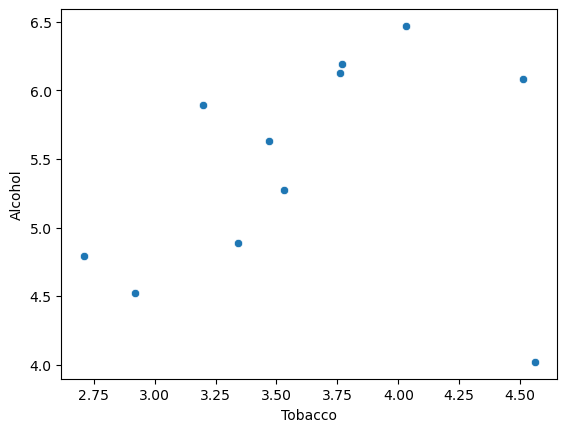

In [240]:
sns.scatterplot(x="Tobacco",y="Alcohol",data=AT)

In [241]:
from statsmodels.formula.api import ols
modelAT=ols('Alcohol~Tobacco',data=(AT))
resultsAT=modelAT.fit()
print(resultsAT.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.056 
Dependent Variable: Alcohol          AIC:                28.6334
Date:               2022-10-25 11:00 BIC:                29.4292
No. Observations:   11               Log-Likelihood:     -12.317
Df Model:           1                F-statistic:        0.4735 
Df Residuals:       9                Prob (F-statistic): 0.509  
R-squared:          0.050            Scale:              0.67179
------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
------------------------------------------------------------------
Intercept   4.3512     1.6067   2.7081   0.0241    0.7166   7.9858
Tobacco     0.3019     0.4388   0.6881   0.5087   -0.6906   1.2945
----------------------------------------------------------------
Omnibus:              3.123        Durbin-Watson:          1.655
Prob(Omnibus):        0.210     

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


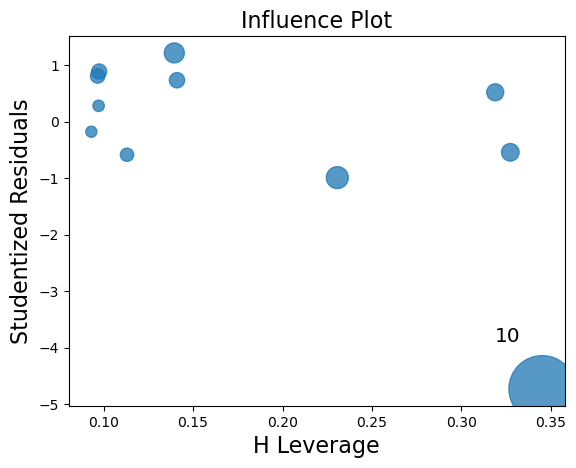

In [242]:
fig=sm.graphics.influence_plot(resultsAT,criterion='cooks')

In [224]:
Cars=pd.read_csv('carSalesPrice.csv')
Cars

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,70755.46672,583,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,yes,yes,yes
1,68566.18719,6420,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,yes,yes,yes
2,69133.73172,7892,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,yes,yes,yes
3,66374.30704,12021,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,yes,yes,yes
4,65281.48124,15600,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
799,26012.37462,34269,SAAB,9_5 HO,Aero Wagon 4D,Wagon,4,2.3,4,yes,yes,yes
800,27280.98206,4836,SAAB,9-2X AWD,Linear Wagon 4D,Wagon,4,2.5,4,yes,yes,no
801,25959.12203,17431,SAAB,9-2X AWD,Linear Wagon 4D,Wagon,4,2.5,4,yes,no,yes
802,23274.48071,21616,SAAB,9-2X AWD,Linear Wagon 4D,Wagon,4,2.5,4,yes,yes,no


In [225]:
from statsmodels.formula.api import ols
model1=ols('Price~Mileage',data=(Cars))
results1=model1.fit()
print(results1.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.019     
Dependent Variable: Price            AIC:                17059.6335
Date:               2022-10-25 10:47 BIC:                17069.0127
No. Observations:   804              Log-Likelihood:     -8527.8   
Df Model:           1                F-statistic:        16.75     
Df Residuals:       802              Prob (F-statistic): 4.68e-05  
R-squared:          0.020            Scale:              9.5830e+07
-------------------------------------------------------------------
             Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept  24764.5590 904.3633 27.3834 0.0000 22989.3605 26539.7575
Mileage       -0.1725   0.0421 -4.0932 0.0000    -0.2553    -0.0898
-------------------------------------------------------------------
Omnibus:              236.450       Durbin-Watson:          0.072 

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

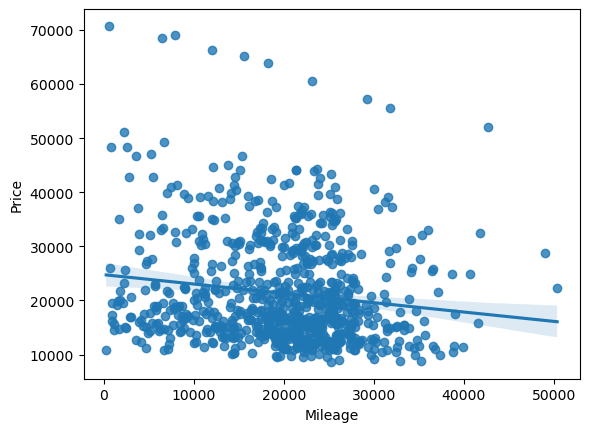

In [243]:
sns.regplot(x="Mileage",y="Price",data=Cars)

eval_env: 1


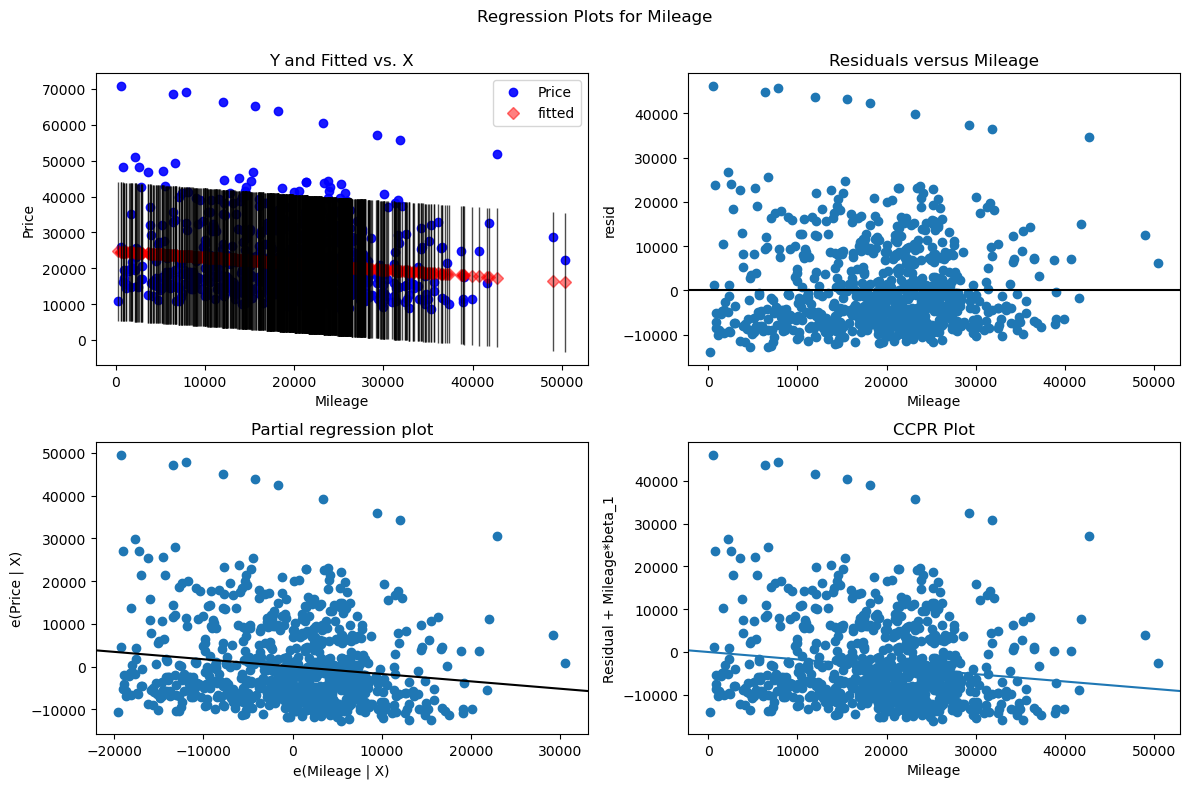

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results1,'Mileage',fig=fig)

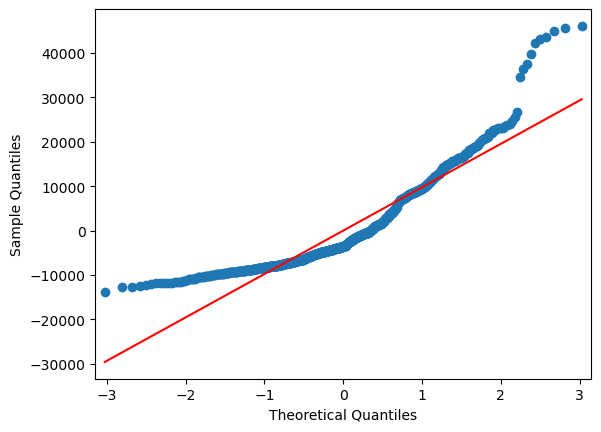

In [228]:
sm.qqplot(results1.resid,line='s')
plt.show()

In [229]:
import scipy
from scipy import stats

stats.shapiro(results1.resid)

ShapiroResult(statistic=0.8634562492370605, pvalue=7.511177935809543e-26)

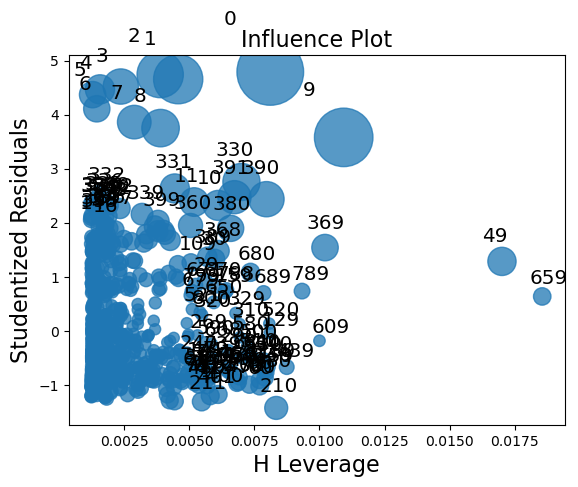

In [230]:
fig=sm.graphics.influence_plot(results1,criterion='cooks')

In [231]:
NewCars=pd.read_csv('carSalesPrice_woCC.csv')
NewCars

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,46732.60603,3625,Chevrolet,Corvette,Conv 2D,Convertible,8,6.0,2,yes,yes,yes
1,47065.20991,5239,Chevrolet,Corvette,Conv 2D,Convertible,8,6.0,2,yes,yes,yes
2,44749.68679,12115,Chevrolet,Corvette,Conv 2D,Convertible,8,6.0,2,yes,no,yes
3,42773.02839,14546,Chevrolet,Corvette,Conv 2D,Convertible,8,6.0,2,yes,yes,yes
4,41371.37927,20000,Chevrolet,Corvette,Conv 2D,Convertible,8,6.0,2,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
789,26012.37462,34269,SAAB,9_5 HO,Aero Wagon 4D,Wagon,4,2.3,4,yes,yes,yes
790,27280.98206,4836,SAAB,9-2X AWD,Linear Wagon 4D,Wagon,4,2.5,4,yes,yes,no
791,25959.12203,17431,SAAB,9-2X AWD,Linear Wagon 4D,Wagon,4,2.5,4,yes,no,yes
792,23274.48071,21616,SAAB,9-2X AWD,Linear Wagon 4D,Wagon,4,2.5,4,yes,yes,no


<AxesSubplot:xlabel='Mileage', ylabel='Price'>

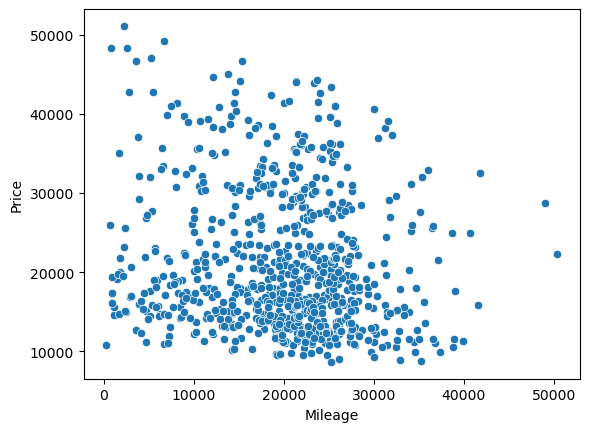

In [233]:
sns.scatterplot(x="Mileage",y="Price",data=NewCars)

In [234]:
from statsmodels.formula.api import ols
model2=ols('Price~Mileage',data=(NewCars))
results2=model2.fit()
print(results2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.020     
Dependent Variable: Price            AIC:                16651.8304
Date:               2022-10-25 10:50 BIC:                16661.1846
No. Observations:   794              Log-Likelihood:     -8323.9   
Df Model:           1                F-statistic:        16.80     
Df Residuals:       792              Prob (F-statistic): 4.59e-05  
R-squared:          0.021            Scale:              7.4902e+07
-------------------------------------------------------------------
             Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept  23894.1855 810.7071 29.4733 0.0000 22302.7967 25485.5743
Mileage       -0.1549   0.0378 -4.0984 0.0000    -0.2292    -0.0807
-------------------------------------------------------------------
Omnibus:               97.023       Durbin-Watson:          0.090 

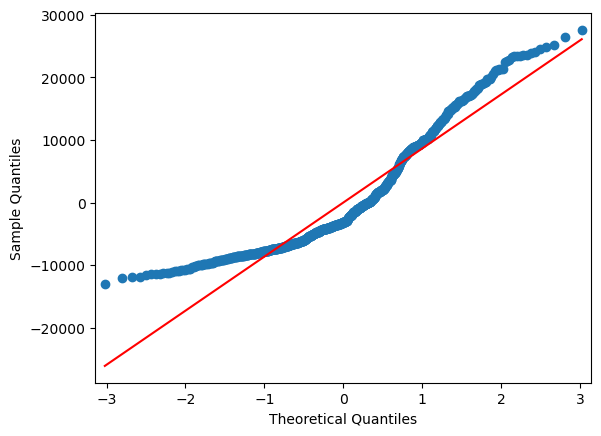

In [235]:
sm.qqplot(results2.resid,line='s')
plt.show()